Yellowbrick is a collection of visual and diagnostic tools called Visualizers and their API.It wraps up Scikit-learn
and Matplotlib features and implements on models.If you don't have these two libraries pre-installed,either install Anaconda which comes with latest versions of these libraries or install yellowbrick.Installing yellowbrick will install scikit-learn >0.18 and matplotlib >2.0 ,<3.0 which works best for yellowbrick.

Visualizers are objects that train on data and show an insight view of model selection.If you are new to yellowbrick,go through yellowbrick docs available at https://www.scikit-yb.org/en/latest .

Can machines outsmart humans?
Hell,ya!!
In Today's world, the rapid increase in innovations towards machine learning models is a clear sign that machines of future can outsmart humans.Well,as of now some areas have already been captured by machines.Predicting crimes and helping humans to stop them is a responsibility and a noble task.There are few softwares used by police depts.of USA.These techniques can be used in India to help tackle crimes.NYPD uses Hunchlab for this.
Let's try making a linear model to predict the hot spots of crimes considering time,place and frequency of crimes in particular areas.

The dataset contains data for crime rate in the state of North Carolina aggregated by county.

Data source: https://github.com/Naba7/NYPD_arrest/crime_v2.csv

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [14]:
crime = pd.read_csv('crime.csv')

In [15]:
crime.head()

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
0,1,87,0.035604,0.298270,0.527596,0.436170,6.71,0.001828,2.422633,30.993681,...,408.724487,221.270065,453.172211,274.177460,334.540008,477.579987,292.089996,311.910004,0.080169,0.077871
1,3,87,0.015253,0.132029,1.481480,0.450000,6.35,0.000746,1.046332,26.892078,...,376.254181,196.010101,258.564972,192.307693,300.380005,409.829987,362.959992,301.470001,0.030227,0.082607
2,5,87,0.012960,0.444444,0.267857,0.600000,6.76,0.001234,0.412766,34.816051,...,372.208435,229.320892,305.944061,209.697220,237.649994,358.980011,331.529999,281.369995,0.465116,0.072115
3,7,87,0.026753,0.364760,0.525424,0.435484,7.14,0.001530,0.491557,42.947586,...,397.690125,191.172012,281.065094,256.721435,281.799988,412.149994,328.269989,299.029999,0.273622,0.073537
4,9,87,0.010623,0.518219,0.476563,0.442623,8.22,0.000860,0.546948,28.054739,...,377.312561,206.821487,289.312469,215.193329,290.890015,377.350006,367.230011,342.820007,0.060086,0.070698


In [17]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 25 columns):
county      91 non-null int64
year        91 non-null int64
crmrte      91 non-null float64
prbarr      91 non-null float64
prbconv     91 non-null float64
prbpris     91 non-null float64
avgsen      91 non-null float64
polpc       91 non-null float64
density     91 non-null float64
taxpc       91 non-null float64
west        91 non-null int64
central     91 non-null int64
urban       91 non-null int64
pctmin80    91 non-null float64
wcon        91 non-null float64
wtuc        91 non-null float64
wtrd        91 non-null float64
wfir        91 non-null float64
wser        91 non-null float64
wmfg        91 non-null float64
wfed        91 non-null float64
wsta        91 non-null float64
wloc        91 non-null float64
mix         91 non-null float64
pctymle     91 non-null float64
dtypes: float64(20), int64(5)
memory usage: 17.9 KB


In [18]:
crime.describe()

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
count,91.000000,91.0,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,...,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,101.615385,87.0,0.033400,0.294917,0.551279,0.410766,9.646813,0.001702,1.428837,38.055066,...,411.667954,211.552901,322.098207,275.564211,335.588683,442.900659,357.521976,312.680769,0.128842,0.083962
std,58.793569,0.0,0.018811,0.136940,0.352243,0.080236,2.846913,0.000987,1.514481,13.077918,...,77.266434,34.216065,53.890163,206.251415,87.841262,59.677816,43.103312,28.235279,0.081331,0.023327
min,1.000000,87.0,0.005533,0.092770,0.068376,0.150000,5.380000,0.000746,0.000020,25.692865,...,187.617264,154.209000,170.940170,133.043060,157.410004,326.100006,258.329987,239.169998,0.019608,0.062158
25%,52.000000,87.0,0.020927,0.205679,0.345411,0.364796,7.340000,0.001231,0.547405,30.662366,...,374.632080,190.863731,286.527420,229.661842,288.875000,400.239990,329.324997,297.264999,0.080735,0.074430
50%,105.000000,87.0,0.029986,0.270950,0.452830,0.423423,9.100000,0.001485,0.962264,34.870213,...,406.504059,203.016235,317.307678,253.228058,320.200012,449.839996,357.690002,308.049988,0.101861,0.077713
75%,152.000000,87.0,0.039642,0.344378,0.588859,0.456778,11.420000,0.001877,1.568242,40.948238,...,443.435822,225.125992,345.353668,280.541275,359.580002,478.029999,382.589996,329.250000,0.151749,0.083498
max,197.000000,87.0,0.098966,1.090910,2.121210,0.600000,20.700001,0.009054,8.827652,119.761452,...,613.226074,354.676117,509.465515,2177.068115,646.849976,597.950012,499.589996,388.089996,0.465116,0.248712


In [19]:
crime[crime['west']+crime['central'] > 1]


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
32,71,87,0.054406,0.243119,0.22959,0.379175,11.29,0.00207,4.834734,31.536579,...,595.371948,240.367325,348.025391,295.230072,358.950012,509.429993,359.109985,339.579987,0.101861,0.07939


In [20]:
(crime==0).sum()

county       0
year         0
crmrte       0
prbarr       0
prbconv      0
prbpris      0
avgsen       0
polpc        0
density      0
taxpc        0
west        68
central     57
urban       83
pctmin80     0
wcon         0
wtuc         0
wtrd         0
wfir         0
wser         0
wmfg         0
wfed         0
wsta         0
wloc         0
mix          0
pctymle      0
dtype: int64

In [22]:
if crime['west'].empty:
    crime['west']=np.NaN

In [24]:
if crime['central'].empty:
    crime['central']=np.NaN

In [25]:
if crime['urban'].empty:
    crime['urban']=np.NaN
    

*Aiming to find correlation between dependent variable and independent variables*
It is necessary to minimize the number of independent variables or features required to optimize the code.Because the more features a model operates on increases the complexity and makes the matrix more sparse which will be difficult to manipulate.Hence,more errors will occur and precisised model can't be obtained.So,it is better to eliminate the weakly correlated features to get a more accurate version of the model.
Yellowbrick has many visualizers such as:
1. Rank Features: rank single and pairs of features to detect covariance
2. RadViz Visualizer: plot data points along axes ordered around a circle to detect separability
3. Parallel Coordinates: plot instances as lines along vertical axes to detect classes or clusters
4. PCA Projection: project higher dimensions into a visual space using PCA
5. Manifold Visualization: visualize high dimensional data using manifold learning
6. Feature Importances: rank features by relative importance in a model
7. Recursive Feature Elimination: select a subset of features by importance
8. Direct Data Visualization: (aka Jointplots) plot 2D correlation between features and target

Here,we are using FeatureImportances visualizer to predict the correlation between the features and dependent variable.It gives Pearson correlation between features.It plots bars to show relativity between the features.The negative correlations shows that the corresponding feature has negative impact on crime-rate.Hence,it should be discarded.



/home/chad7/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


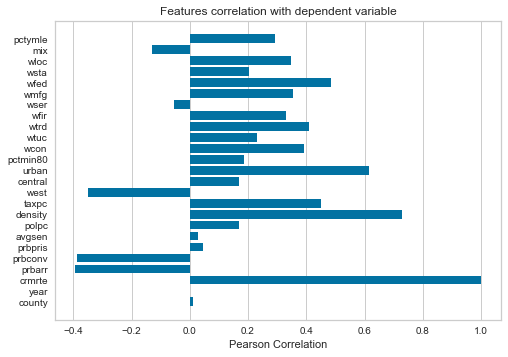

In [94]:
from yellowbrick.target import FeatureCorrelation
df=pd.DataFrame(crime)
#df=df.drop(['crmrte'],axis=1)
X=df.values
data['feature_names']=['county','year','crmrte','prbarr','prbconv','prbpris','avgsen','polpc','density','taxpc','west','central','urban','pctmin80','wcon','wtuc','wtrd','wfir','wser','wmfg','wfed','wsta','wloc','mix','pctymle']
y = np.array(crime['crmrte'])
feature_names = data['feature_names']

visualizer = FeatureCorrelation(labels=feature_names)
visualizer.fit(X, y)
visualizer.poof()


We see that features having (<0.4) covariance has almost no impact on the dependent variable.So,we get our features to use.

From above plot,we see that density and urban areas have more impact on crime-rate.As obviously,if density increases,the crime-rate will increase.As of nowadays,urban areas face a lot increase in crime-rate.Our plot clearly shows this information.Now,We will check how strongly those features are correlated to each other. 

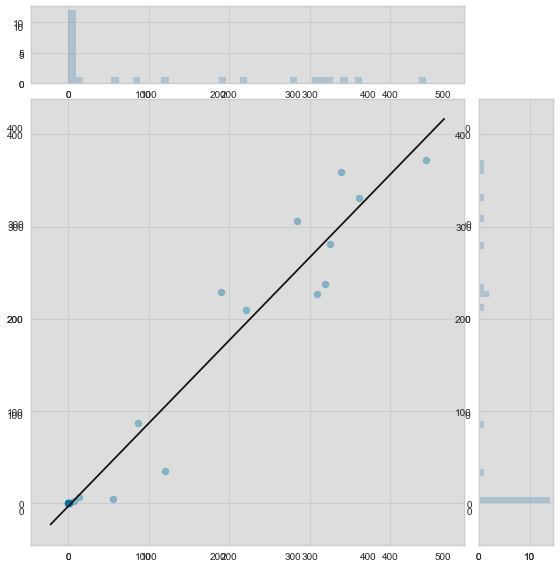

In [99]:
from yellowbrick.features import JointPlotVisualizer
for i in (0,24):
    visualizer = JointPlotVisualizer(feature=data['feature_names'][i], target=data['feature_names'][2])
    visualizer.fit(X[i], X[2])
    visualizer.poof()

This visualizer plots a scatter diagram showing a linear fit.The dependent variable on y-axis and features on x-axis depicts a univariate relationship between them.The JointPlotVisualizer gives an at-a-glance view of the very strong positive correlation of the features, as well as the range and distribution of each feature.The axes are normalized to the space between zero and one, a common technique in machine learning to reduce the impact of one feature over another.

In [109]:
crime_corr = crime.corr()['crmrte']
list1 = crime_corr[abs(crime_corr) > 0.4].sort_values(ascending=False)
list1

crmrte     1.000000
density    0.728963
urban      0.615602
wfed       0.486156
taxpc      0.450980
wtrd       0.410106
Name: crmrte, dtype: float64

crime_corr shows only the strongly correlated features having a covariance (>0.4). 

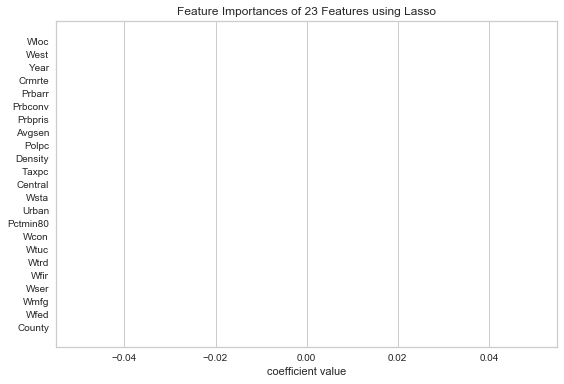

In [187]:
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso

from yellowbrick.features.importances import FeatureImportances
fig = plt.figure()
ax = fig.add_subplot()

df=pd.DataFrame(crime)
df=df.drop(['crmrte'],axis=1)
X=df.values
data['feature_names']=['county','year','crmrte','prbarr','prbconv','prbpris','avgsen','polpc','density','taxpc','west','central','urban','pctmin80','wcon','wtuc','wtrd','wfir','wser','wmfg','wfed','wsta','wloc','mix','pctymle']
y = np.array(crime['crmrte'])
feature_names = data['feature_names']


labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(Lasso(), ax=ax, labels=labels, relative=False)

viz.fit(X, y)
viz.poof()


The above figure shows the features ranked according to the explained variance each feature contributes to the model.In scikit-learn, Decision Tree models and ensembles of trees such as Random Forest, Gradient Boosting, and Ada Boost provide a feature_importances_ attribute when fitted. The Yellowbrick FeatureImportances visualizer utilizes this attribute to rank and plot relative importances In this case the features are plotted against their relative importance, that is the percent importance of the most important feature.

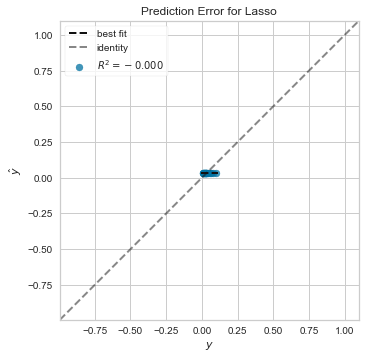

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError


lasso = Lasso()
visualizer = PredictionError(lasso)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g= visualizer.poof()             



The error plot shows the actual targets from predicted targets by the model.Here,the features lie mostly on the 45 degree line showing that it contains minimal errors.The deviation of the regression fit line from 45 degree line shows the error in the plot.

Bivariate visualization is performed to find the relationship between each variable in the dataset and the target variable of interest, i.e. crime rate.


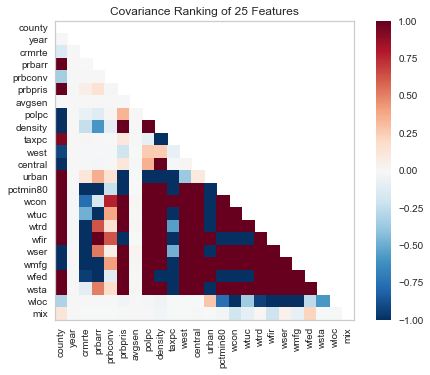

In [115]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                
visualizer.transform(X)             
visualizer.poof() 

a) Based on the above pair plot, it can be noted that density feature is most positively correlated with crime rate.

b) Strangely, the weekly wage features and crime rate is found to be slightly positively correlated. This signifies unequal distribution of income or probably high unemployment rate.

We want to identify features that have a linear relationship with each other, potentially introducing covariance into our model and use regularization. We can use the Rank2D visualizer to compute Pearson correlations between all pairs of features.Pearson correlation between pairs of features is such that each cell in the grid represents two features identified in order on the x and y axes and whose color displays the magnitude of the correlation. A Pearson correlation of 1.0 means that there is a strong positive, linear relationship between the pairs of variables and a value of -1.0 indicates a strong negative.

County 185 and 115 don't contribute to the correlation.
Probability greater than one(prbarr>1 and prbconv>1) is meaningless.The crime-rate around west and central both are not contributing towards correlation.The feature year has negative effect on crime-rate.So,all of these should be eliminated.We will get a better model if we eliminate these features.

In [116]:
crime = crime[crime.county != 185]
crime = crime[crime.county != 115]
crime = crime[crime['prbarr'] < 1]
crime = crime[crime['prbconv'] < 1]
crime = crime[crime['west']+crime['central'] <= 1]
crime = crime.drop('year', axis=1)

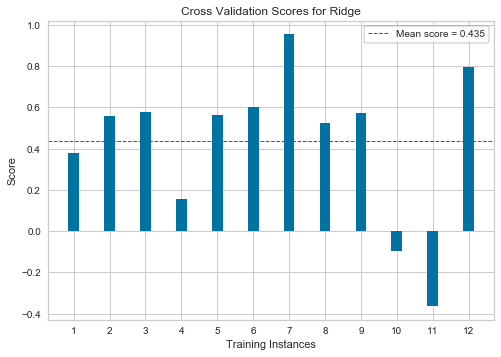

In [157]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold

df=pd.DataFrame(crime)
df=df.drop(['crmrte'],axis=1)
X=df.values
data['feature_names']=['county','year','crmrte','prbarr','prbconv','prbpris','avgsen','polpc','density','taxpc','west','central','urban','pctmin80','wcon','wtuc','wtrd','wfir','wser','wmfg','wfed','wsta','wloc','mix','pctymle']
y = np.array(crime['crmrte'])
feature_names = data['feature_names']

_, ax = plt.subplots()

cv = KFold(12)

oz = CVScores(
    Ridge(), ax=ax, cv=cv, scoring='r2'
)

oz.fit(X, y)
oz.poof()

A given model is known to be optimal by looking at it’s F1, precision, recall, and accuracy (for classification), or it’s coefficient of determination (R2) and error (for regression). However, real world data is often distributed unevenly. Yellowbrick’s CVScores visualizer enables us to visually explore these variations in performance using different cross validation strategies.In Yellowbrick, the CVScores visualizer displays cross-validated scores as a bar chart with the average score across all folds plotted as a horizontal dotted line.Here,the average score is 0.435.

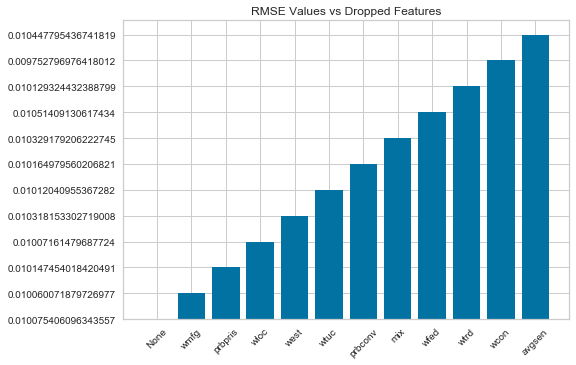

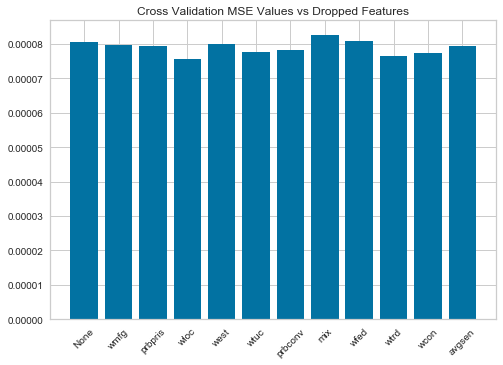

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
def calculateRMSE(X, y, feature='None'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    RMSE = str(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))    
    return RMSE


from sklearn.model_selection import cross_val_score

rmseVals = []
cv_scores = []
droppedFeatures = []
 

y = crime['crmrte']
X = crime.drop(['crmrte', 'urban', 'county'], axis=1)

rmseVals.append(calculateRMSE(X, y))
droppedFeatures.append('None')
scores = cross_val_score(LinearRegression(), 
                         X, y, cv=10, scoring='neg_mean_squared_error')
cv_scores.append(-1*scores.mean())
featuresTest = ['wmfg', 'prbpris', 'wloc', 'west', 'wtuc', 
                 'prbconv', 'mix', 'wfed', 'wtrd', 'wcon', 'avgsen']

for feature in featuresTest:
    features2Drop.append(feature)
    X = crime.drop(features2Drop, axis=1)
    features2Drop.remove(feature)
    rmseVals.append(calculateRMSE(X, y, feature))
    droppedFeatures.append(feature)

    scores = cross_val_score(LinearRegression(), 
                             X, y, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(-1*scores.mean())
        
plt.bar(droppedFeatures, rmseVals)
plt.title('RMSE Values vs Dropped Features')
plt.xticks(rotation=45)
plt.show()

plt.bar(droppedFeatures, cv_scores)
plt.title('Cross Validation MSE Values vs Dropped Features')
plt.xticks(rotation=45)
plt.show()

We will test the change in RMSE value when the features(p>0.05) are removed.From the bar chart, the RMSE values performs better when wtrd & avgsen features are removed, along with the previously removed features.Since wtrd has a higher p-value than avgsen, we will remove only wtrd from our model.

Coefficients: 
 [ 1.14455707e-05 -5.41273224e-02 -3.31991665e-03  2.52152692e-02
 -8.38636980e-04  1.14971283e+01  5.40177730e-03  2.13860606e-04
 -2.41402220e-03 -5.44348741e-03  4.62957833e-03  2.78107178e-04
  4.57417479e-05  3.71385715e-06  5.45543692e-05 -5.22284216e-05
 -6.47204419e-05 -7.83002186e-06  1.49637510e-05 -4.46131165e-05
  4.23470061e-06 -3.19131730e-02  1.39130534e-01]
Mean squared error: 0.00
Variance score: 0.75


ValueError: x and y must be the same size

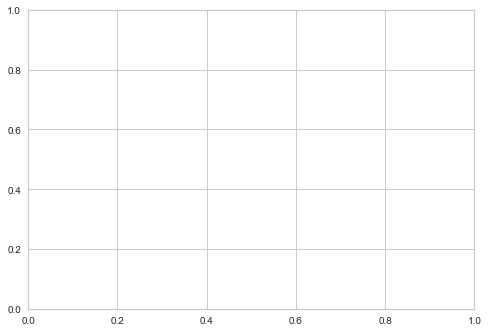

In [178]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


df=pd.DataFrame(crime)
df=df.drop(['crmrte'],axis=1)
X=df.values
data['feature_names']=['county','year','crmrte','prbarr','prbconv','prbpris','avgsen','polpc','density','taxpc','west','central','urban','pctmin80','wcon','wtuc','wtrd','wfir','wser','wmfg','wfed','wsta','wloc','mix','pctymle']
y = np.array(crime['crmrte'])
from sklearn.impute import SimpleImputer
imp = SimpleImputer(copy=True,fill_value=None,missing_values=np.nan, strategy='mean',verbose=0)
imp.fit(y.reshape(1,-1))       
imp.transform(y.reshape(1,-1))          
feature_names = data['feature_names']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test,y_pred))
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test,y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


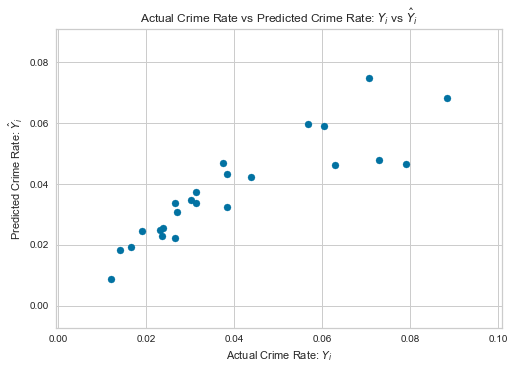

In [180]:
def linearReg(x_train, y_train, x_test, y_test):
    
    lm = LinearRegression()
    lm.fit(x_train, y_train)

    y_pred = lm.predict(x_test)

    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Crime Rate: $Y_i$")
    plt.ylabel("Predicted Crime Rate: $\hat{Y}_i$")
    plt.title("Actual Crime Rate vs Predicted Crime Rate: $Y_i$ vs $\hat{Y}_i$")
    plt.show()
    delta_y = y_test - y_pred;

from sklearn.model_selection import train_test_split

y = crime['crmrte']
X = crime.drop(['crmrte', 'urban', 'county', 
                    'wmfg', 'prbpris', 'wloc', 
                    'west', 'wtuc', 'wtrd', 'wcon'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

linearReg(X_train, y_train, X_test, y_test)

We will split the input data set into train and test. Test data is used to evaluate model performance.“Actual Crime Rate” vs “Predicted Crime Rate” plot is linear.


In the above case study, we have used linear regression to predict crime rate of a county. The same idea can be extended to predict incidents of crime and generate a heat map, given location or GPS coordinates in the dataset. Such a predicted crime-rate heat map of different cities would assist police, to prevent crimes, by optimal distribution of their limited resources.